In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
plt.rcParams['figure.figsize'] = [13, 7]

In [2]:
random.random()

0.111487322820643

In [3]:
def pay5(results):
    bets = len(results)
    six = results.count(6)
    five = results.count(5)
    four = results.count(4)
    three = results.count(3)
    two = results.count(2)
    payout = five * 10 + four*2 + three*0.4
    return payout - bets

In [4]:
def pay2(results):
    bets = len(results)
    two = results.count(2)
    payout = two*2
    return payout-bets

In [5]:
def prob(size,n,percent):
    
    result = []
    for i in range(n):
        y = 0
        for i in range(size):
            x = random.random()
            if x < percent:
                x = 1
            else:
                x = 0
            y = y + x
        result.append(y)
    return result

In [6]:
def taco(size,n,percent):
    
    result = []
    for i in range(n):
        y = 0
        x = random.random()
        if x < 0.8:
            x = 1
        else:
            x = 0
        y = y + x
        for i in range(size-1):
            x = random.random()
            if x < percent:
                x = 1
            else:
                x = 0
            y = y + x
        result.append(y)
    return result

n = 10000
ans = taco(5,n,0.55)
ans[0:10]

[2, 3, 2, 3, 3, 3, 1, 3, 3, 5]

In [7]:
ans2 = prob(5,n,0.55)
pay5(ans2)

522.7999999999993

In [92]:
def betsim(bets,betsize_init,n,edge,scale=False):
    y = []
    x = []
    bankroll = bankroll_init
    ans = prob(5,n,edge)
    tacoans = taco(5,n,edge)
    if scale==False:
        betsize = betsize_init
    for i in range(bets):
        if bankroll <0:
            x.append(i)
            y.append(0)
        else:
            if scale!=False:
                betsize = max(bankroll*scale/100,5)
            x.append(i)
            if i % 10 == 0:
                betsize = 25
                result = tacoans[i]
            else:
                result = ans[i]
            if result == 5:
                payout = betsize*9
            elif result == 4:
                payout = betsize
            elif result == 3:
                payout = -betsize*0.6
            else:
                payout = -betsize
            bankroll = bankroll + payout
            y.append(bankroll)
    return(x,y)

In [93]:
np.array(range(1,20))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

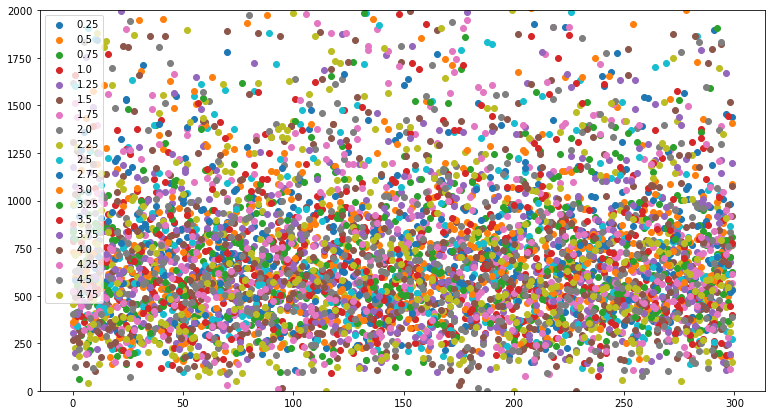

In [94]:

table = []
bs = np.array(range(20))

#for b in [0.2,0.5,1,2,3,5,10]:
for b in np.array(range(1,20))/4:
    bankroll_init = 500
    betsize = b
    n = 100
    edge = 0.56
    bets = 100
    ys = []
    for run in range(300):
        x,y = betsim(bets,betsize,n,edge,scale=b)
        ys.append(y)
    final = []
    for i in range(len(ys)):
        final.append(ys[i][-1])
    final = np.array(final)
    avg = np.median(final)
    quarter = np.percentile(final,25)
    tenth = np.percentile(final,10)
    eightieth = np.percentile(final,80)
    broke = sum(final<=bankroll_init*0.25)
    profitable = sum(final>bankroll_init)
    table.append([b,avg,quarter,tenth,eightieth,broke,profitable])
    plt.scatter(range(len(final)),final,label=b)
    plt.legend()
    plt.ylim(0,2000)
    

    
    

In [95]:
df = pd.DataFrame(table,columns=[['betsize','avg','quarter','tenth','eightieth','broke','profit']])
df

,betsize,avg,quarter,tenth,eightieth,broke,profit
0,0.25,681.000000,502.000000,399.600000,902.400000,0,226
1,0.50,642.000000,494.000000,405.800000,876.800000,0,219
2,0.75,631.683074,496.833484,399.400000,869.468841,0,220
3,1.00,609.926546,472.258133,356.511181,839.284416,0,212
4,1.25,650.592845,495.446144,380.726964,925.023593,0,224
5,1.50,618.794188,483.835485,354.844894,892.643756,0,211
6,1.75,633.023509,469.239207,367.340692,1041.872983,0,213
7,2.00,651.356469,484.198809,349.382598,944.987050,0,217
8,2.25,671.340323,440.292840,302.262830,1110.673940,0,205
9,2.50,653.855672,431.412587,290.145800,1171.045651,2,204


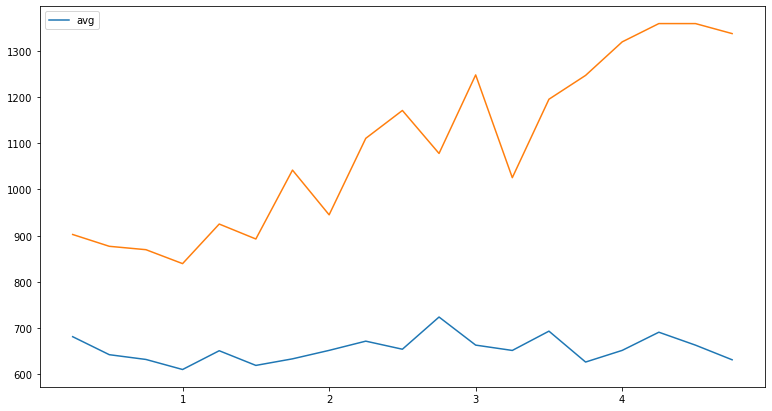

In [96]:
plt.plot(df.betsize.values,df.avg.values,label='avg')
plt.plot(df.betsize.values,df.eightieth.values)
plt.legend()

Text(0, 0.5, 'money')

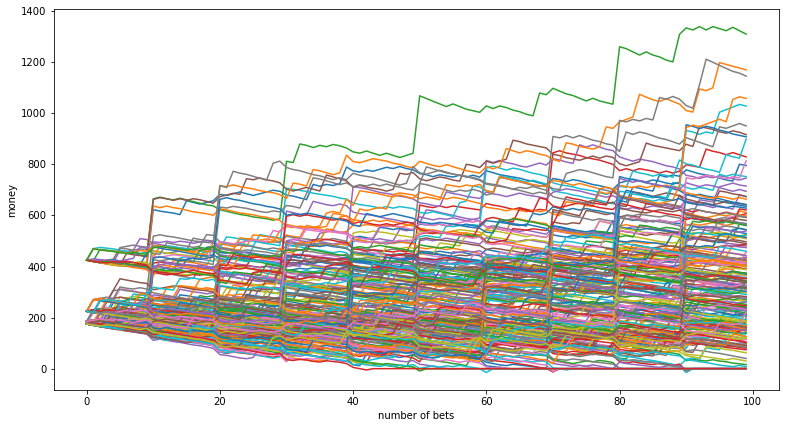

In [12]:
bankroll_init = 200
betsize = 5
n = 10000
edge = 0.55
bets = 100
ys = []
for run in range(200):
    ans = prob(5,n,edge)
    x,y = betsim(bets,betsize,n,edge,scale=1)
    ys.append(y)
    plt.plot(x,y)
plt.xlabel('number of bets') 
plt.ylabel('money')

max 1310.1134052461775
avg 336.6593036702096
broke 17
profitable 133


(array([21., 11., 13., 21., 19., 15., 18., 12., 18.,  8.,  9.,  9.,  7.,
         4.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  0.]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
         550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
        1100, 1150, 1200, 1250, 1300]),
 <BarContainer object of 26 artists>)

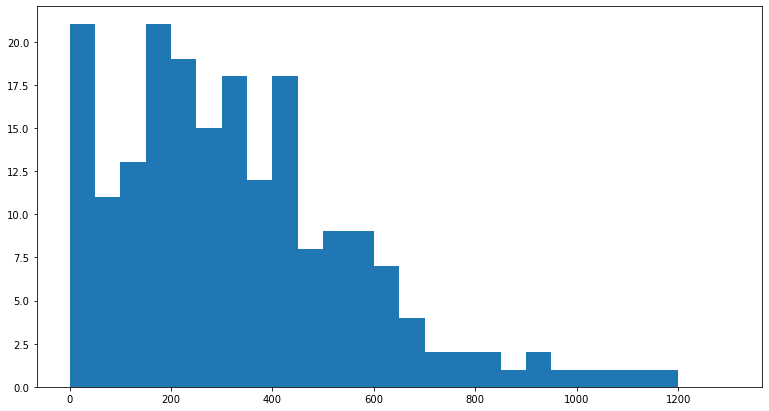

In [13]:
final = []
for i in range(len(ys)):
    final.append(ys[i][-1])
final = np.array(final)
print('max',max(final))
print('avg',np.mean(final))
print('broke',sum(final<=0))
print('profitable',sum(final>bankroll_init))
plt.hist(final,bins=list(range(0,int(max(final)),50)))